### EEG Dataset: Bonn University Dataset (Andrzejak et al., 2001)

#### Description:
This dataset was published by Andrzejak et al. (2001) and is commonly referred to as the **Bonn EEG Dataset**. It contains **single-channel EEG signals** recorded under five different conditions (sets A–E). Each EEG signal is 23.6 seconds long and contains **4096 data points**, sampled at **173.61 Hz**.

#### Dataset Composition:
The dataset is divided into five sets, each with 100 files:

- **Set A (Z)**: Surface EEG from healthy volunteers with eyes open.
- **Set B (O)**: Surface EEG from healthy volunteers with eyes closed.
- **Set C (N)**: Intracranial EEG from epileptic patients, taken from the **non-seizure zone** during seizure-free intervals.
- **Set D (F)**: Intracranial EEG from epileptic patients, taken from the **seizure-prone zone** during seizure-free intervals.
- **Set E (S)**: Intracranial EEG from epileptic patients **during seizures** (ictal state).

Each `.txt` file contains one signal with 4096 samples (23.6 seconds long).

####  Sampling Rate:
- 173.61 Hz
- Bandwidth: 0.5–85 Hz (though raw files are unfiltered; recommended low-pass filter: 40 Hz)

---

#### Citation:

Please ensure you cite the following original publication if you use this data in any research or publication:

> **Andrzejak RG, Lehnertz K, Rieke C, Mormann F, David P, Elger CE (2001).**  
> *Indications of nonlinear deterministic and finite-dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state.*  
> **Physical Review E**, 64(6), 061907.  
> DOI: [10.1103/PhysRevE.64.061907](https://doi.org/10.1103/PhysRevE.64.061907)





In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fftpack import fft
from scipy.signal import welch
import pandas as pd

In [ ]:
import zipfile
import os

# Path to where your ZIP files are stored
zip_path = "DataSet"  # change to your path
extract_to = "Dataset"

# Make sure the output folders exist
os.makedirs(extract_to, exist_ok=True)

for zip_name in ["Z.zip", "O.zip", "N.zip", "F.zip", "S.zip"]:
    set_name = zip_name[0]  # Z, O, N, F, S
    with zipfile.ZipFile(os.path.join(zip_path, zip_name), 'r') as zip_ref:
        extract_folder = os.path.join(extract_to, set_name)
        os.makedirs(extract_folder, exist_ok=True)
        zip_ref.extractall(extract_folder)
        print(f"Extracted {zip_name} to {extract_folder}")


In [7]:
import os
import numpy as np

base_path = r"C:\Users\Admin\Desktop\IEEE_Intership\Dataset"
sets = ['Z', 'O', 'N', 'F', 'S']
data = {}

for set_label in sets:
    folder = os.path.join(base_path, set_label)
    signals = []
    if os.path.exists(folder):
        for file in sorted(os.listdir(folder)):
            if file.lower().endswith('.txt'):
                file_path = os.path.join(folder, file)
                try:
                    signal = np.loadtxt(file_path)
                    if signal.shape[0] == 4096:
                        signals.append(signal)
                    elif signal.shape[0] == 4097:
                        print(f"Trimmed {file} — had 4097 samples")
                        signals.append(signal[:4096])
                    else:
                        print(f"Skipped {file} — unexpected shape {signal.shape}")
                except Exception as e:
                    print(f"Error reading {file}: {e}")
        data[set_label] = np.array(signals)
    else:
        print(f"Folder not found: {folder}")




Trimmed Z001.txt — had 4097 samples
Trimmed Z002.txt — had 4097 samples
Trimmed Z003.txt — had 4097 samples
Trimmed Z004.txt — had 4097 samples
Trimmed Z005.txt — had 4097 samples
Trimmed Z006.txt — had 4097 samples
Trimmed Z007.txt — had 4097 samples
Trimmed Z008.txt — had 4097 samples
Trimmed Z009.txt — had 4097 samples
Trimmed Z010.txt — had 4097 samples
Trimmed Z011.txt — had 4097 samples
Trimmed Z012.txt — had 4097 samples
Trimmed Z013.txt — had 4097 samples
Trimmed Z014.txt — had 4097 samples
Trimmed Z015.txt — had 4097 samples
Trimmed Z016.txt — had 4097 samples
Trimmed Z017.txt — had 4097 samples
Trimmed Z018.txt — had 4097 samples
Trimmed Z019.txt — had 4097 samples
Trimmed Z020.txt — had 4097 samples
Trimmed Z021.txt — had 4097 samples
Trimmed Z022.txt — had 4097 samples
Trimmed Z023.txt — had 4097 samples
Trimmed Z024.txt — had 4097 samples
Trimmed Z025.txt — had 4097 samples
Trimmed Z026.txt — had 4097 samples
Trimmed Z027.txt — had 4097 samples
Trimmed Z028.txt — had 4097 

In [8]:
#Summary of loaded data
for set_label in data:
    print(f"Set {set_label}: {data[set_label].shape}")

Set Z: (100, 4096)
Set O: (100, 4096)
Set N: (100, 4096)
Set F: (100, 4096)
Set S: (100, 4096)


In [ ]:
# Creating a DataFrame Form the .txt files 
import os
import numpy as np
import pandas as pd

base_path = r"C:\Users\Admin\Desktop\IEEE_Intership\Dataset"
sets = ['Z', 'O', 'N', 'F', 'S']
labels = {'Z': 0, 'O': 1, 'N': 2, 'F': 3, 'S': 4}

data_rows = []

for set_label in sets:
    folder = os.path.join(base_path, set_label)
    for file in sorted(os.listdir(folder)):
        if file.lower().endswith('.txt'):
            filepath = os.path.join(folder, file)
            try:
                signal = np.loadtxt(filepath)
                if signal.shape[0] >= 4096:
                    signal = signal[:4096]  # Trim extra if needed
                    data_rows.append([set_label, labels[set_label], file] + list(signal))
            except Exception as e:
                print(f"Error loading {file}: {e}")

# Create column names
columns = ['set', 'label', 'filename'] + [f't{i}' for i in range(4096)]

# Convert to DataFrame
df = pd.DataFrame(data_rows, columns=columns)
print("DataFrame shape:", df.shape)



DataFrame shape: (500, 4099)


In [10]:
df.head()

,set,label,filename,t0,t1,t2,t3,t4,t5,t6,...,t4086,t4087,t4088,t4089,t4090,t4091,t4092,t4093,t4094,t4095
0,Z,0,Z001.txt,12.0,22.0,35.0,45.0,69.0,74.0,79.0,...,-37.0,-31.0,-28.0,-21.0,-14.0,-14.0,-25.0,-28.0,-11.0,8.0
1,Z,0,Z002.txt,-56.0,-50.0,-64.0,-91.0,-135.0,-140.0,-134.0,...,-43.0,-63.0,-82.0,-114.0,-138.0,-159.0,-172.0,-180.0,-173.0,-162.0
2,Z,0,Z003.txt,-37.0,-22.0,-17.0,-24.0,-31.0,-20.0,-5.0,...,-117.0,-91.0,-52.0,-23.0,-14.0,-5.0,-3.0,7.0,3.0,4.0
3,Z,0,Z004.txt,-31.0,-43.0,-39.0,-39.0,-9.0,-5.0,18.0,...,-22.0,-32.0,-32.0,-40.0,-23.0,-1.0,11.0,12.0,-6.0,10.0
4,Z,0,Z005.txt,14.0,26.0,32.0,25.0,16.0,8.0,8.0,...,-3.0,1.0,-19.0,-29.0,-35.0,-51.0,-55.0,-58.0,-32.0,-6.0


In [11]:
# the structure of your existing DataFrame
print(df.shape)      # Rows and columns
print(df.columns)    # column names
df.head(2)           # First 2 rows (check format)


(500, 4099)
Index(['set', 'label', 'filename', 't0', 't1', 't2', 't3', 't4', 't5', 't6',
       ...
       't4086', 't4087', 't4088', 't4089', 't4090', 't4091', 't4092', 't4093',
       't4094', 't4095'],
      dtype='object', length=4099)


,set,label,filename,t0,t1,t2,t3,t4,t5,t6,...,t4086,t4087,t4088,t4089,t4090,t4091,t4092,t4093,t4094,t4095
0,Z,0,Z001.txt,12.0,22.0,35.0,45.0,69.0,74.0,79.0,...,-37.0,-31.0,-28.0,-21.0,-14.0,-14.0,-25.0,-28.0,-11.0,8.0
1,Z,0,Z002.txt,-56.0,-50.0,-64.0,-91.0,-135.0,-140.0,-134.0,...,-43.0,-63.0,-82.0,-114.0,-138.0,-159.0,-172.0,-180.0,-173.0,-162.0


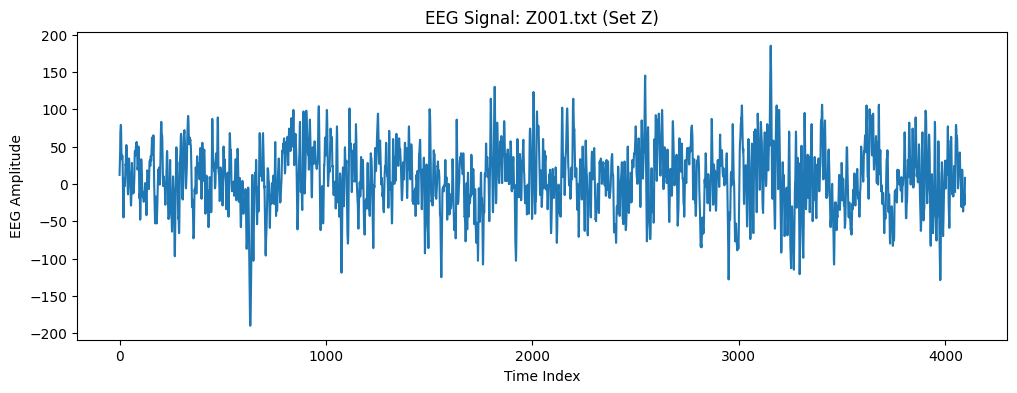

In [12]:
import matplotlib.pyplot as plt

# Plot one EEG signal (first row)
signal = df.iloc[0, 3:]  # from t0 to t4095
plt.figure(figsize=(12, 4))
plt.plot(signal.values)
plt.title(f"EEG Signal: {df.iloc[0]['filename']} (Set {df.iloc[0]['set']})")
plt.xlabel("Time Index")
plt.ylabel("EEG Amplitude")
plt.show()


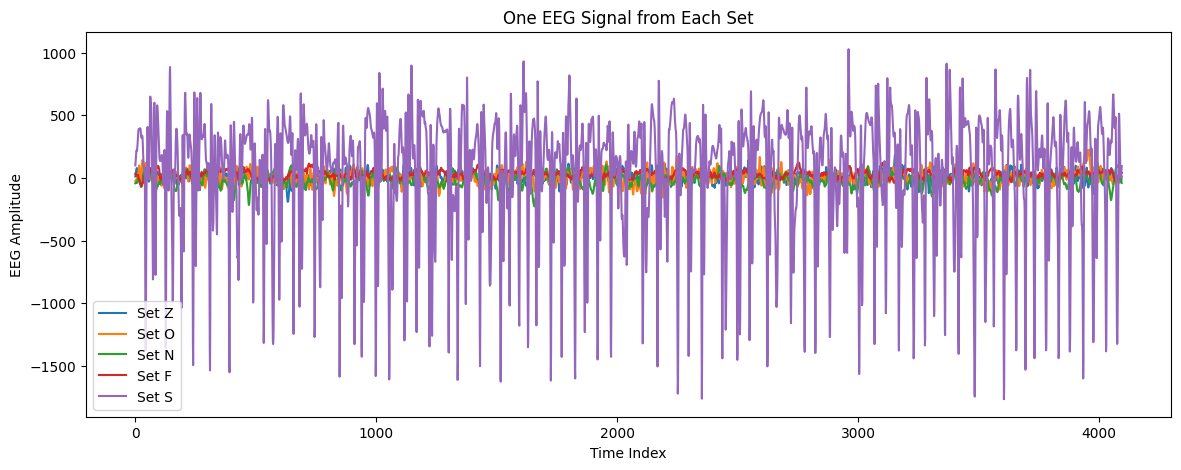

In [13]:
plt.figure(figsize=(14, 5))
for s in df['set'].unique():
    signal = df[df['set'] == s].iloc[0, 3:]
    plt.plot(signal.values, label=f"Set {s}")
plt.title("One EEG Signal from Each Set")
plt.xlabel("Time Index")
plt.ylabel("EEG Amplitude")
plt.legend()
plt.show()


In [14]:
# For entire dataset
mean_value = df.iloc[:, 3:].values.mean()
min_value = df.iloc[:, 3:].values.min()
max_value = df.iloc[:, 3:].values.max()

print(f"Mean value: {mean_value:.2f}")
print(f" Min value : {min_value}")
print(f"Max value : {max_value}")


Mean value: -7.72
 Min value : -1885.0
Max value : 2047.0


In [15]:
# Group by class and calculate stats
class_stats = []

for s in df['set'].unique():
    signals = df[df['set'] == s].iloc[:, 3:].values  # all rows for that set, only signal columns
    class_stats.append({
        'set': s,
        'mean': signals.mean(),
        'min': signals.min(),
        'max': signals.max(),
        'std': signals.std()
    })

# Create a DataFrame to display
stats_df = pd.DataFrame(class_stats)
print(stats_df)


  set       mean     min     max         std
0   Z  -6.260244  -288.0   294.0   48.338935
1   O -12.513406  -424.0   360.0   70.682810
2   N  -8.879707  -412.0   623.0   59.385956
3   F  -6.200117 -1147.0  2047.0   90.345289
4   S  -4.739412 -1885.0  2047.0  341.123385


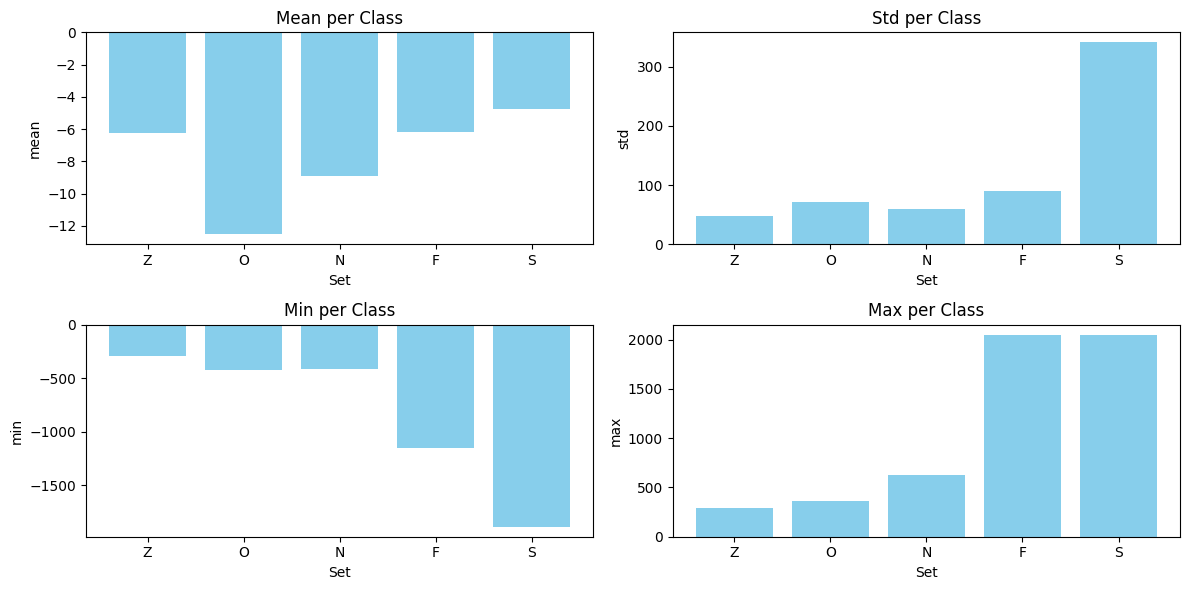

In [16]:
import matplotlib.pyplot as plt

# Reuse stats_df from earlier:
# Columns: set, mean, min, max, std

# Plot bar charts for each metric
metrics = ['mean', 'std', 'min', 'max']

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    plt.bar(stats_df['set'], stats_df[metric], color='skyblue')
    plt.title(f'{metric.capitalize()} per Class')
    plt.xlabel('Set')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_12476\237023655.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=long_df, x='set', y='value', palette='Set2')


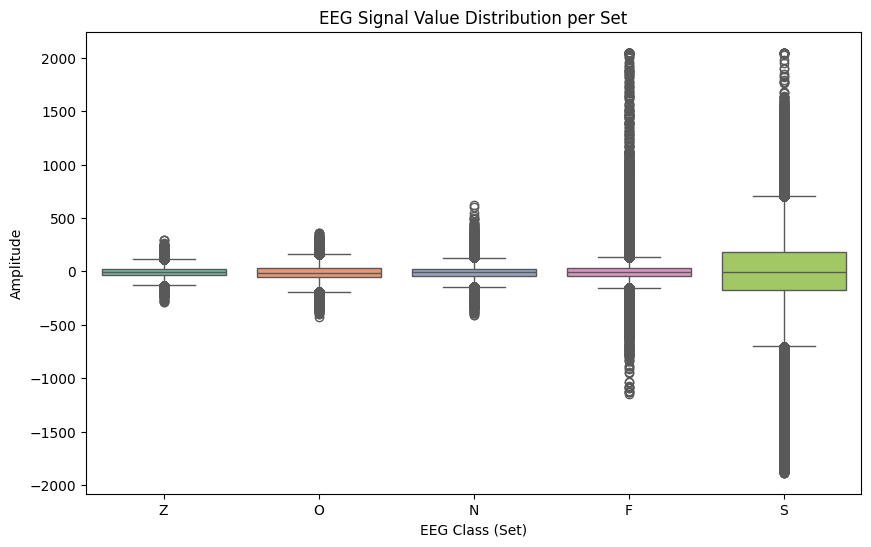

In [17]:
import pandas as pd
import seaborn as sns

# Flatten signals from each class
long_data = []

for s in df['set'].unique():
    subset = df[df['set'] == s].iloc[:, 3:].values  # signal only
    flattened = subset.flatten()
    long_data.extend([(s, val) for val in flattened])

# Create long-form DataFrame
long_df = pd.DataFrame(long_data, columns=['set', 'value'])

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=long_df, x='set', y='value', palette='Set2')
plt.title('EEG Signal Value Distribution per Set')
plt.xlabel('EEG Class (Set)')
plt.ylabel('Amplitude')
plt.show()


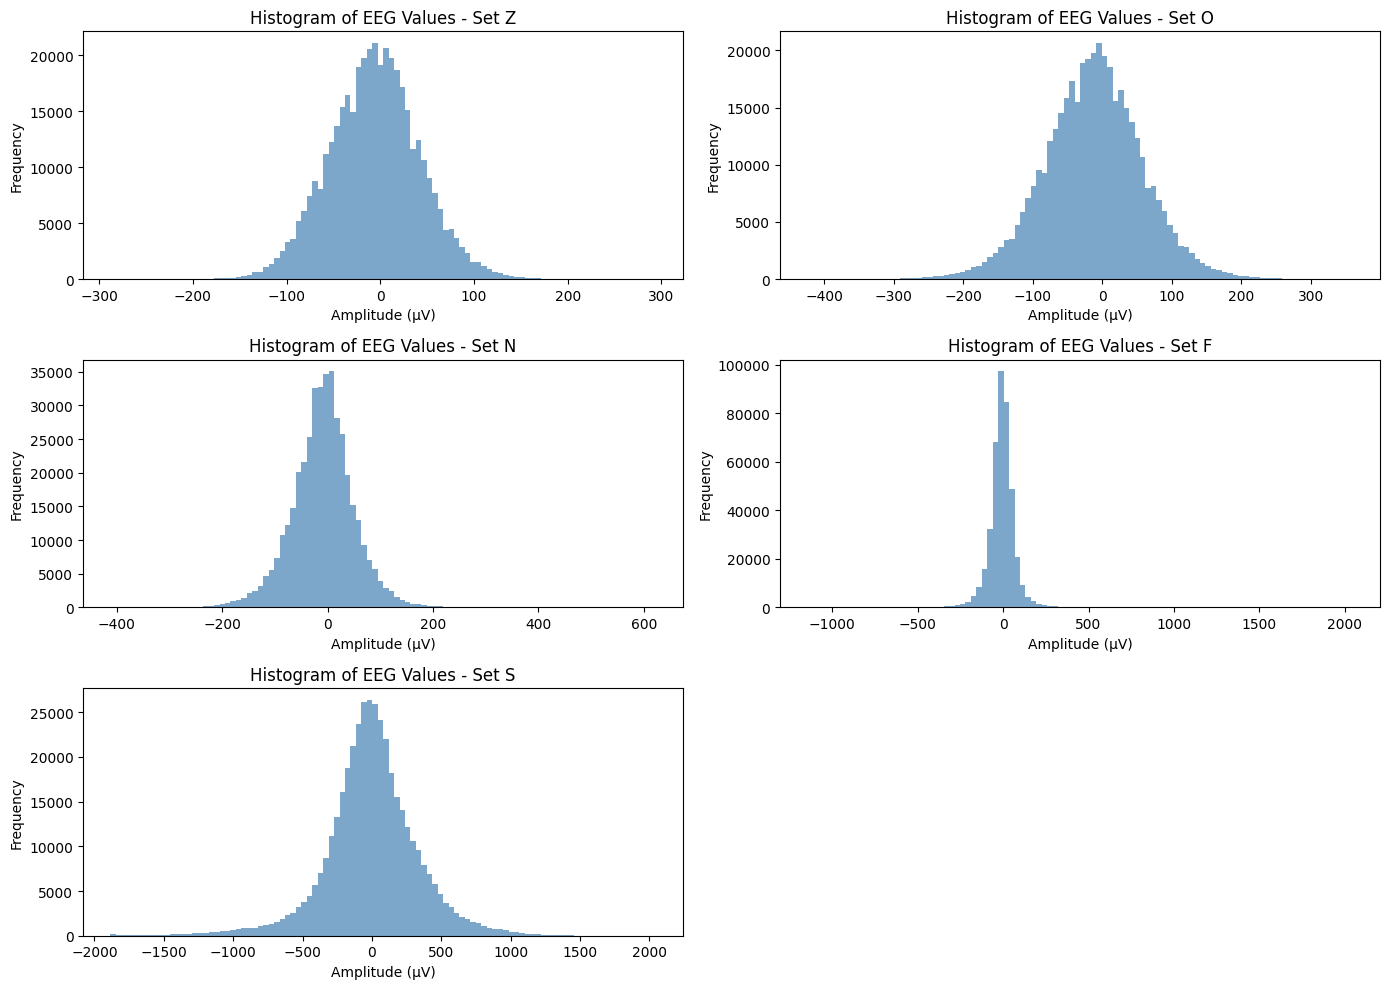

In [18]:
plt.figure(figsize=(14, 10))

sets = df['set'].unique()

for i, s in enumerate(sets):
    subset = df[df['set'] == s].iloc[:, 3:].values.flatten()
    plt.subplot(3, 2, i + 1)
    plt.hist(subset, bins=100, alpha=0.7, color='steelblue')
    plt.title(f"Histogram of EEG Values - Set {s}")
    plt.xlabel("Amplitude (µV)")
    plt.ylabel("Frequency")
    plt.grid(False)

plt.tight_layout()

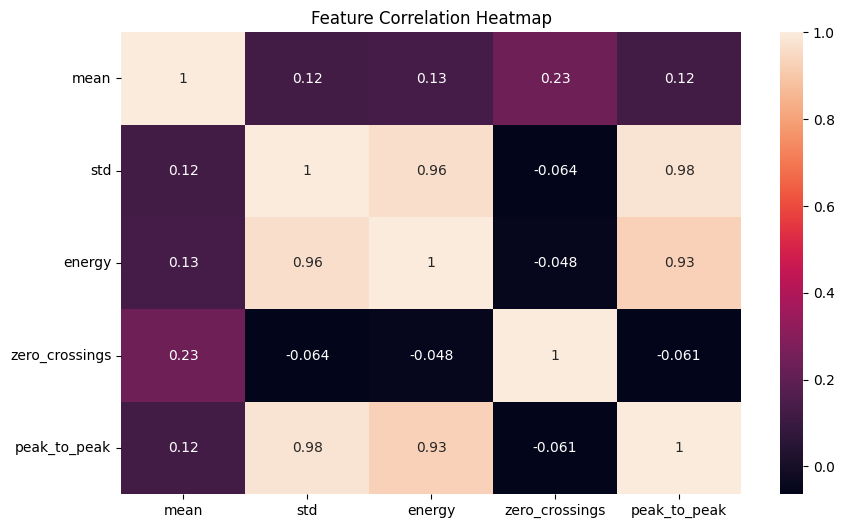

In [19]:
import seaborn as sns
from scipy.stats import skew, kurtosis

# Extract features from each signal
feature_rows = []

for _, row in df.iterrows():
    signal = row.iloc[3:].values
    feature_rows.append({
        'set': row['set'],
        'label': row['label'],
        'mean': np.mean(signal),
        'std': np.std(signal),
    
        'energy': np.sum(signal**2),
        'zero_crossings': np.count_nonzero(np.diff(np.sign(signal))),
        'peak_to_peak': np.ptp(signal)
    })

feature_df = pd.DataFrame(feature_rows)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(feature_df.drop(['set', 'label'], axis=1).corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_12476\981032593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=feature_df, x='set', y='energy', palette='muted')


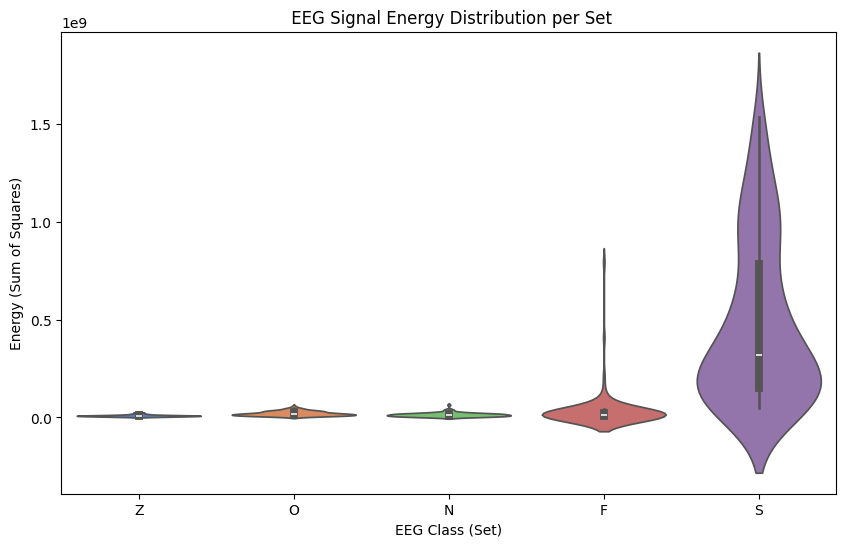

In [20]:
# Create violin plot to compare energy across sets
plt.figure(figsize=(10, 6))
sns.violinplot(data=feature_df, x='set', y='energy', palette='muted')
plt.title(' EEG Signal Energy Distribution per Set')
plt.xlabel('EEG Class (Set)')
plt.ylabel('Energy (Sum of Squares)')
plt.show()


In [21]:
from scipy.fftpack import fft
from scipy.signal import welch
from scipy.stats import entropy
import numpy as np

def bandpower(signal, fs, band):
    freqs, psd = welch(signal, fs=fs, nperseg=1024)
    idx = np.logical_and(freqs >= band[0], freqs <= band[1])
    return np.trapz(psd[idx], freqs[idx])

def hjorth_params(signal):
    first_deriv = np.diff(signal)
    second_deriv = np.diff(first_deriv)

    var_zero = np.var(signal)
    var_d1 = np.var(first_deriv)
    var_d2 = np.var(second_deriv)

    activity = var_zero
    mobility = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt(var_d2 / var_d1) / mobility

    return activity, mobility, complexity

def spectral_entropy(signal, fs):
    freqs, psd = welch(signal, fs=fs, nperseg=1024)
    psd_norm = psd / np.sum(psd)
    return entropy(psd_norm)

def line_length(signal):
    return np.sum(np.abs(np.diff(signal)))

# Sampling rate from Bonn dataset
fs = 173.61

advanced_features = []

for _, row in df.iterrows():
    signal = row.iloc[3:].values.astype(float)

    # Time-domain: Hjorth
    activity, mobility, complexity = hjorth_params(signal)

    # Frequency-domain: Bandpowers
    delta = bandpower(signal, fs, (0.5, 4))
    theta = bandpower(signal, fs, (4, 8))
    alpha = bandpower(signal, fs, (8, 13))
    beta = bandpower(signal, fs, (13, 30))
    gamma = bandpower(signal, fs, (30, 80))

    # Spectral entropy
    spec_ent = spectral_entropy(signal, fs)

    # Line length
    ll = line_length(signal)

    advanced_features.append({
        'set': row['set'],
        'label': row['label'],
        'activity': activity,
        'mobility': mobility,
        'complexity': complexity,
        'delta_power': delta,
        'theta_power': theta,
        'alpha_power': alpha,
        'beta_power': beta,
        'gamma_power': gamma,
        'spectral_entropy': spec_ent,
        'line_length': ll
    })

advanced_df = pd.DataFrame(advanced_features)
print(" Advanced features extracted:")



 Advanced features extracted:


In [22]:
advanced_df.head()

,set,label,activity,mobility,complexity,delta_power,theta_power,alpha_power,beta_power,gamma_power,spectral_entropy,line_length
0,Z,0,1813.209726,0.335985,2.179939,610.918519,346.819455,484.392397,189.312136,12.192325,4.505837,46686.0
1,Z,0,2383.044922,0.392777,1.946530,673.705451,403.268031,654.023550,511.784460,21.899010,4.766602,61038.0
2,Z,0,2222.001190,0.337717,2.199411,837.374543,269.000276,642.744029,224.112680,13.330849,4.399890,51191.0
3,Z,0,2216.009763,0.494420,2.122999,499.171217,374.036397,535.150195,516.780586,61.239642,4.967596,74991.0
4,Z,0,2017.486328,0.368030,2.369085,688.726255,236.735714,551.626978,259.024499,24.554466,4.451513,52862.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_12476\2857025189.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=advanced_df, x='set', y=feature, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12476\2857025189.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=advanced_df, x='set', y=feature, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_12476\2857025189.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=advanced_df, x='set', y=feature, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel

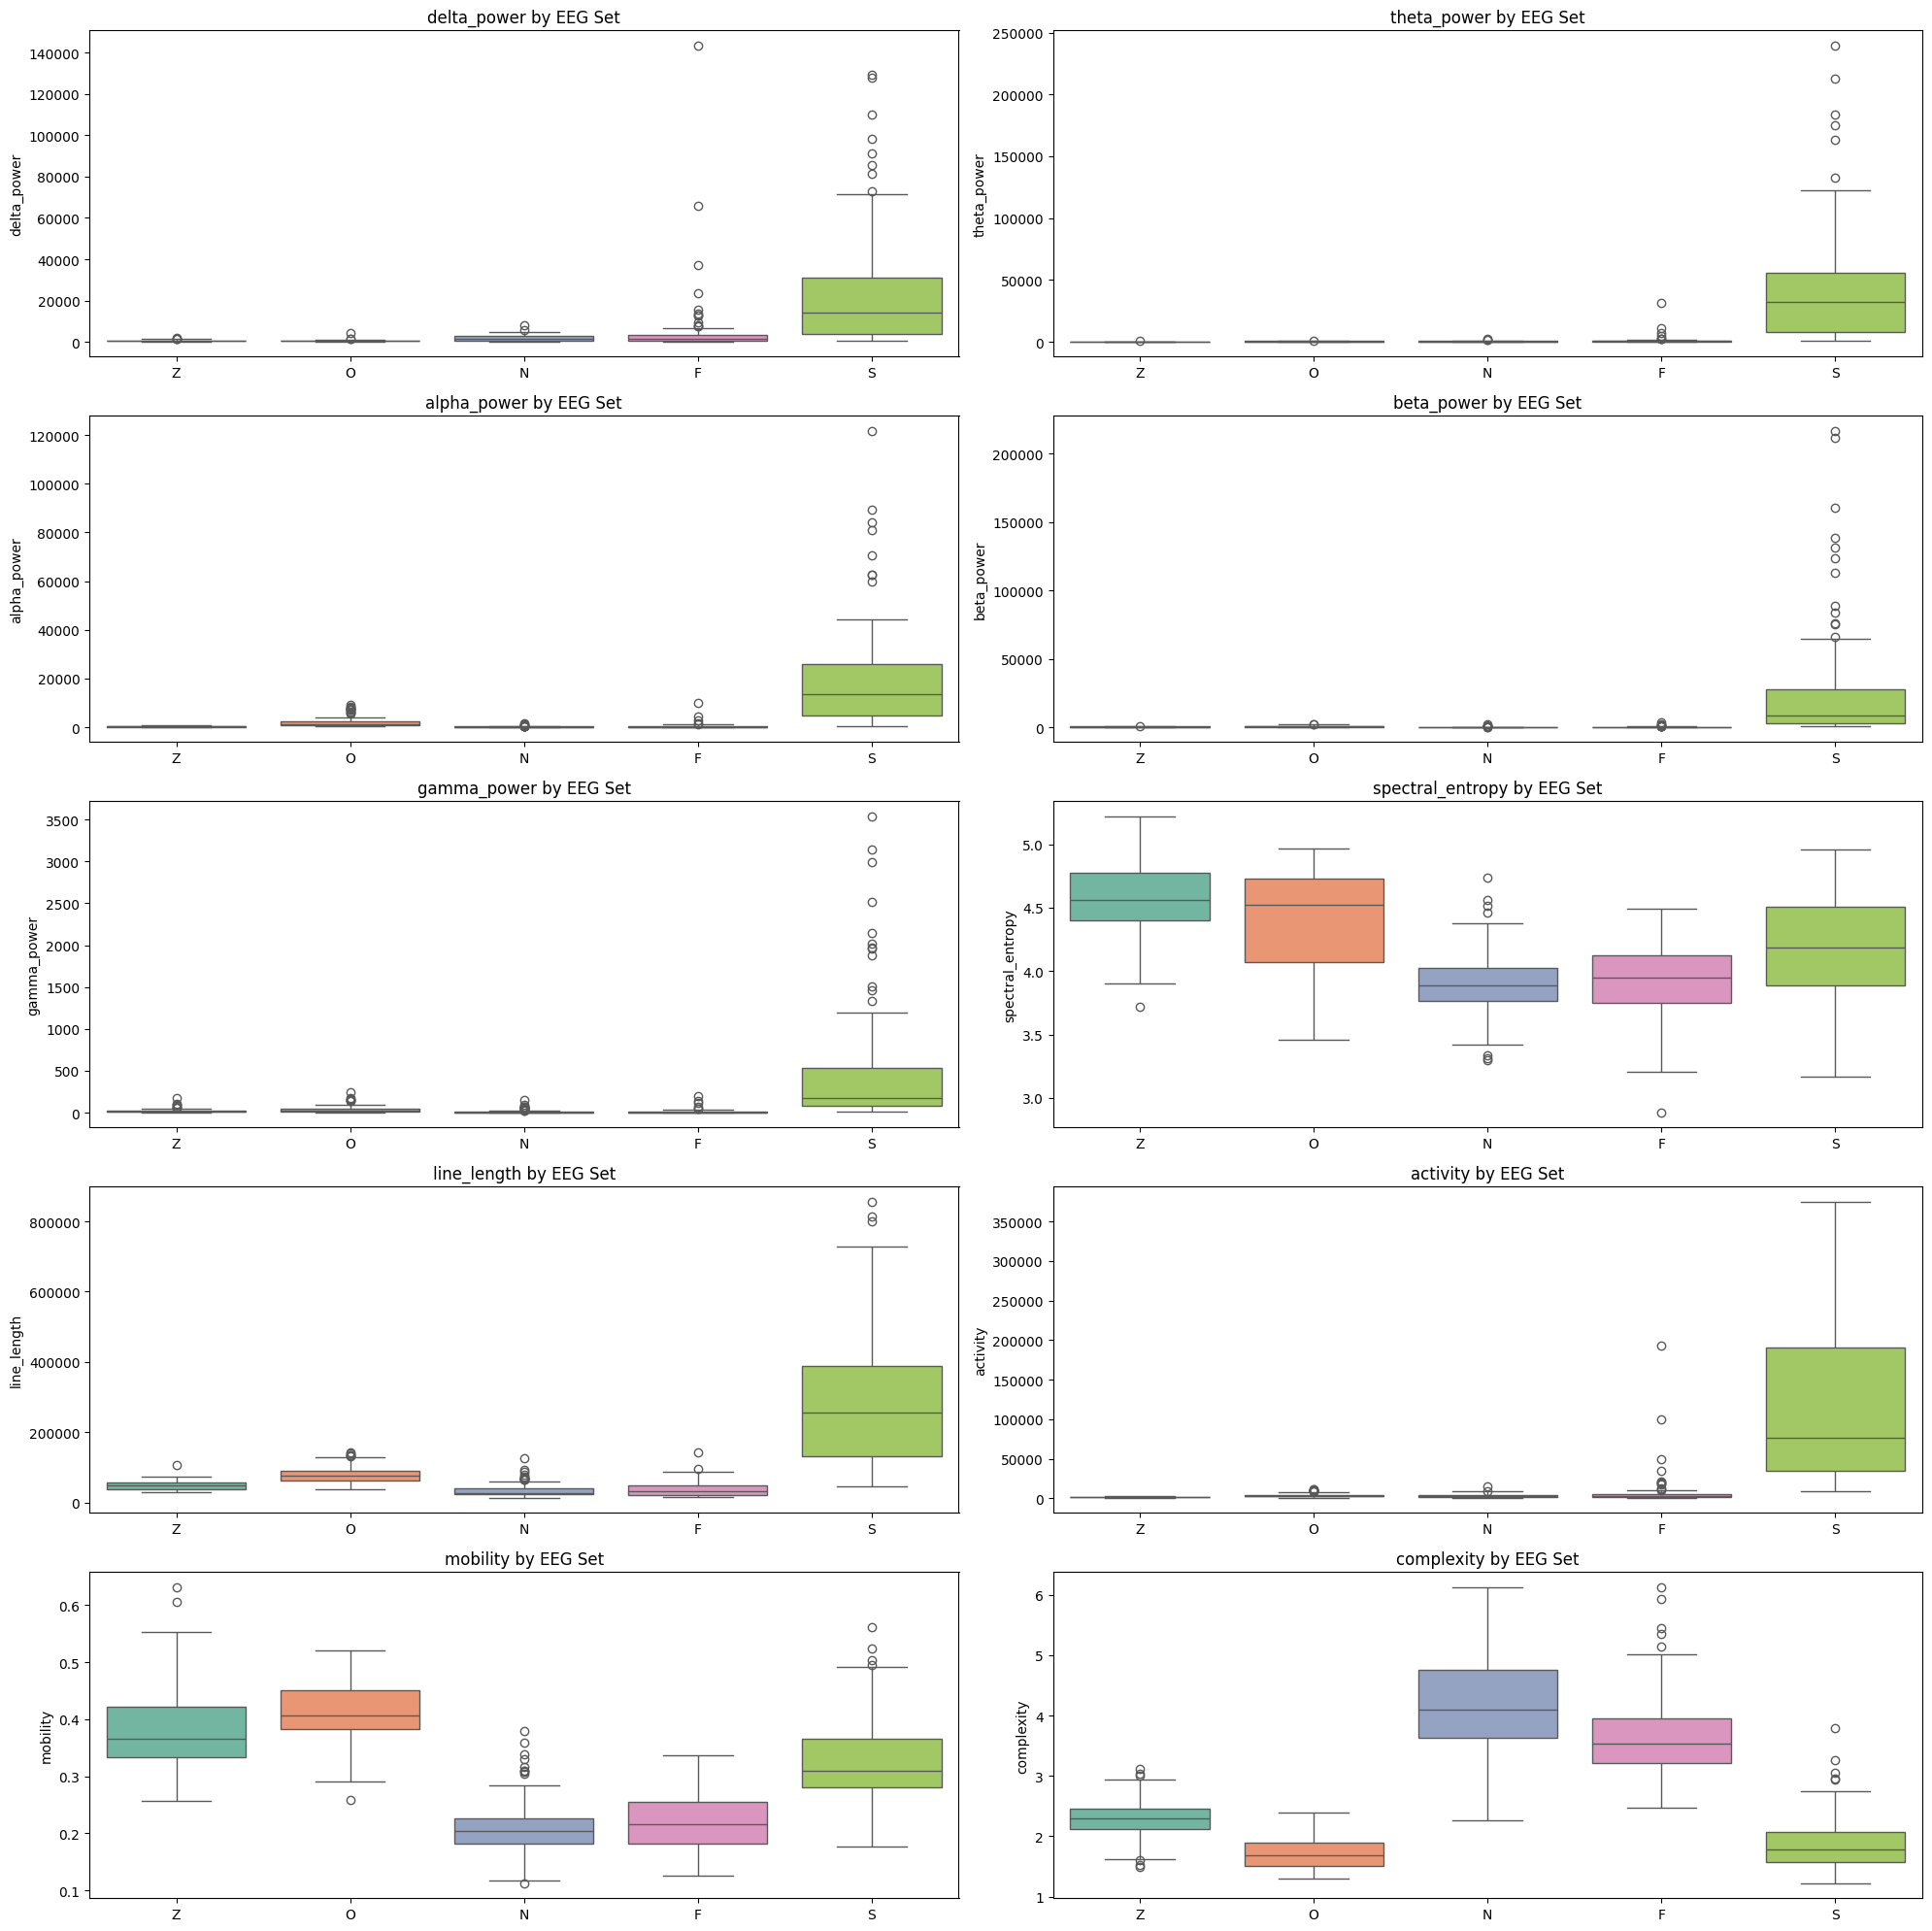

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose features to visualize
features_to_plot = ['delta_power', 'theta_power', 'alpha_power', 
                    'beta_power', 'gamma_power', 'spectral_entropy', 
                    'line_length', 'activity', 'mobility', 'complexity']

# Create boxplots
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features_to_plot):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(data=advanced_df, x='set', y=feature, palette='Set2')
    plt.title(f'{feature} by EEG Set')
    plt.xlabel('')
    plt.grid(False)

plt.tight_layout()
plt.show()


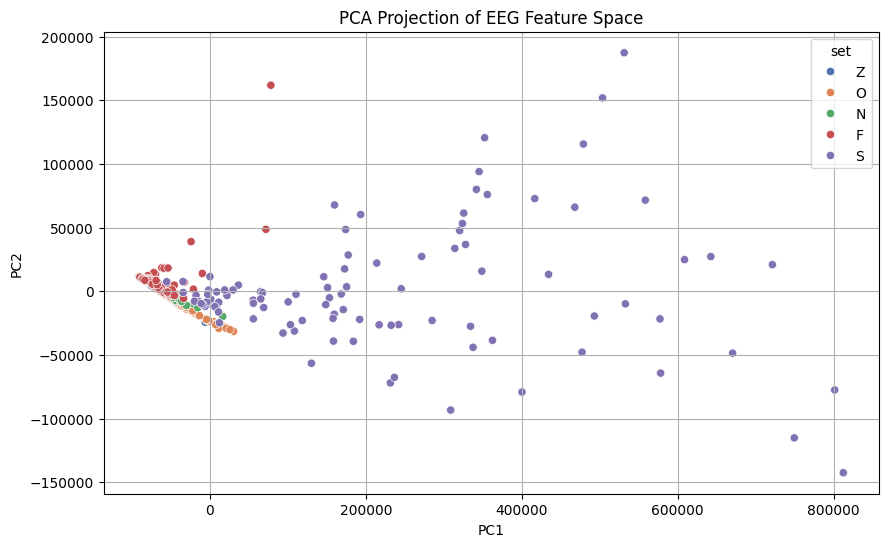

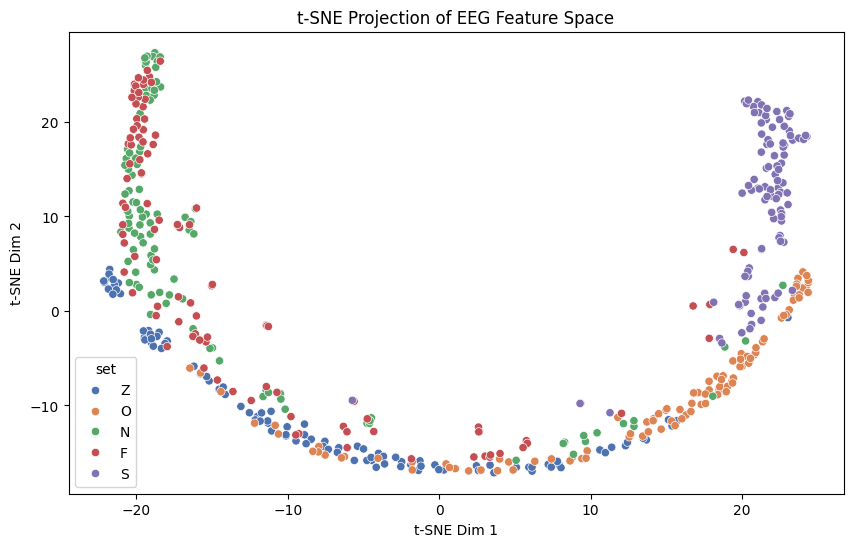

In [24]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

X = advanced_df.drop(columns=['set', 'label'])
y = advanced_df['set']

# 1️ PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=y, palette='deep')
plt.title("PCA Projection of EEG Feature Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# 2 t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=y, palette='deep')
plt.title("t-SNE Projection of EEG Feature Space")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.grid(False)
plt.show()


In [25]:
def get_condition(set_label):
    if set_label == 'S':
        return 'seizure'
    else:
        return 'non-seizure'

# Add to base df and advanced_df
df['condition'] = df['set'].apply(get_condition)
advanced_df['condition'] = advanced_df['set'].apply(get_condition)

# Check counts
print(" Class distribution:")
print(advanced_df['condition'].value_counts())


 Class distribution:
condition
non-seizure    400
seizure        100
Name: count, dtype: int64


In [26]:
# 1 = seizure, 0 = non-seizure
advanced_df['target'] = advanced_df['condition'].map({'seizure': 1, 'non-seizure': 0})


In [27]:
advanced_df.head()

,set,label,activity,mobility,complexity,delta_power,theta_power,alpha_power,beta_power,gamma_power,spectral_entropy,line_length,condition,target
0,Z,0,1813.209726,0.335985,2.179939,610.918519,346.819455,484.392397,189.312136,12.192325,4.505837,46686.0,non-seizure,0
1,Z,0,2383.044922,0.392777,1.946530,673.705451,403.268031,654.023550,511.784460,21.899010,4.766602,61038.0,non-seizure,0
2,Z,0,2222.001190,0.337717,2.199411,837.374543,269.000276,642.744029,224.112680,13.330849,4.399890,51191.0,non-seizure,0
3,Z,0,2216.009763,0.494420,2.122999,499.171217,374.036397,535.150195,516.780586,61.239642,4.967596,74991.0,non-seizure,0
4,Z,0,2017.486328,0.368030,2.369085,688.726255,236.735714,551.626978,259.024499,24.554466,4.451513,52862.0,non-seizure,0


In [28]:
from sklearn.cluster import KMeans

# Prepare data for clustering
X_cluster = advanced_df.drop(['set', 'label', 'condition', 'target'], axis=1)

# KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
advanced_df['cluster'] = kmeans.fit_predict(X_cluster)


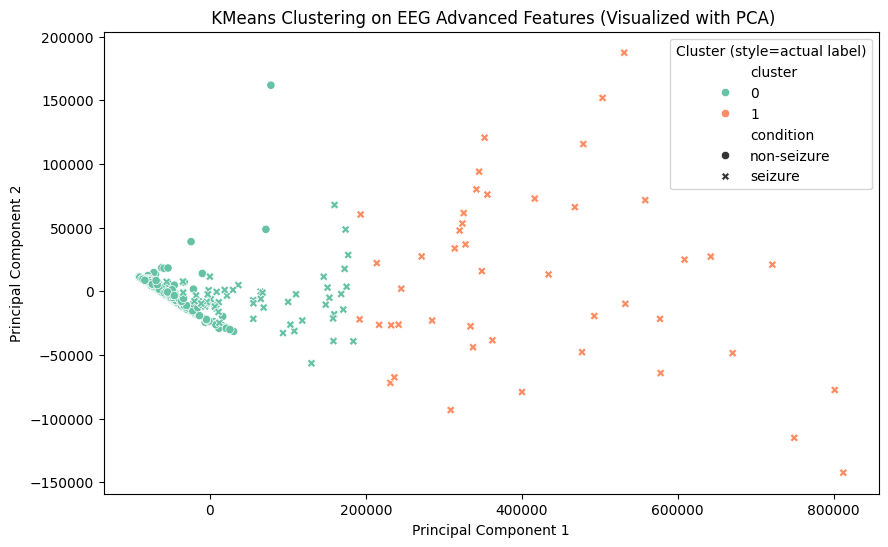

In [29]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_cluster)

# Add PCA results to the DataFrame for plotting
advanced_df['pc1'] = pca_result[:, 0]
advanced_df['pc2'] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=advanced_df, x='pc1', y='pc2', hue='cluster', palette='Set2', style='condition')
plt.title(" KMeans Clustering on EEG Advanced Features (Visualized with PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster (style=actual label)")
plt.show()


In [30]:
# Automatically detect only the EEG signal columns (those starting with 't')
signal_columns = [col for col in df.columns if col.startswith('t')]

# Select one seizure and one non-seizure signal
seizure_signal = df[df['condition'] == 'seizure'][signal_columns].iloc[0].astype(float).values
non_seizure_signal = df[df['condition'] == 'non-seizure'][signal_columns].iloc[0].astype(float).values

# Create time axis (sampling rate = 173.61 Hz)
import numpy as np
import matplotlib.pyplot as plt

time = np.arange(len(seizure_signal)) / 173.61



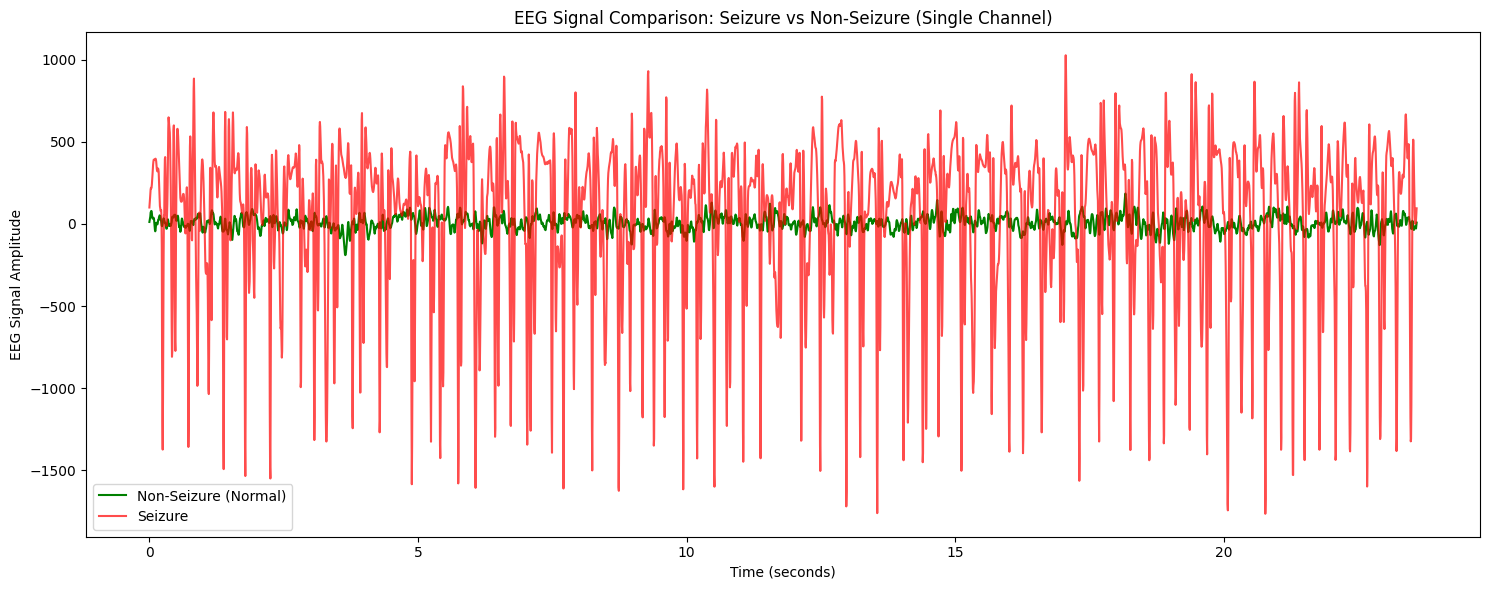

In [31]:
plt.figure(figsize=(15, 6))

plt.plot(time, non_seizure_signal, label='Non-Seizure (Normal)', color='green')
plt.plot(time, seizure_signal, label='Seizure', color='red', alpha=0.7)

plt.title("EEG Signal Comparison: Seizure vs Non-Seizure (Single Channel)")
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Signal Amplitude")
plt.legend()
plt.tight_layout()
plt.show()


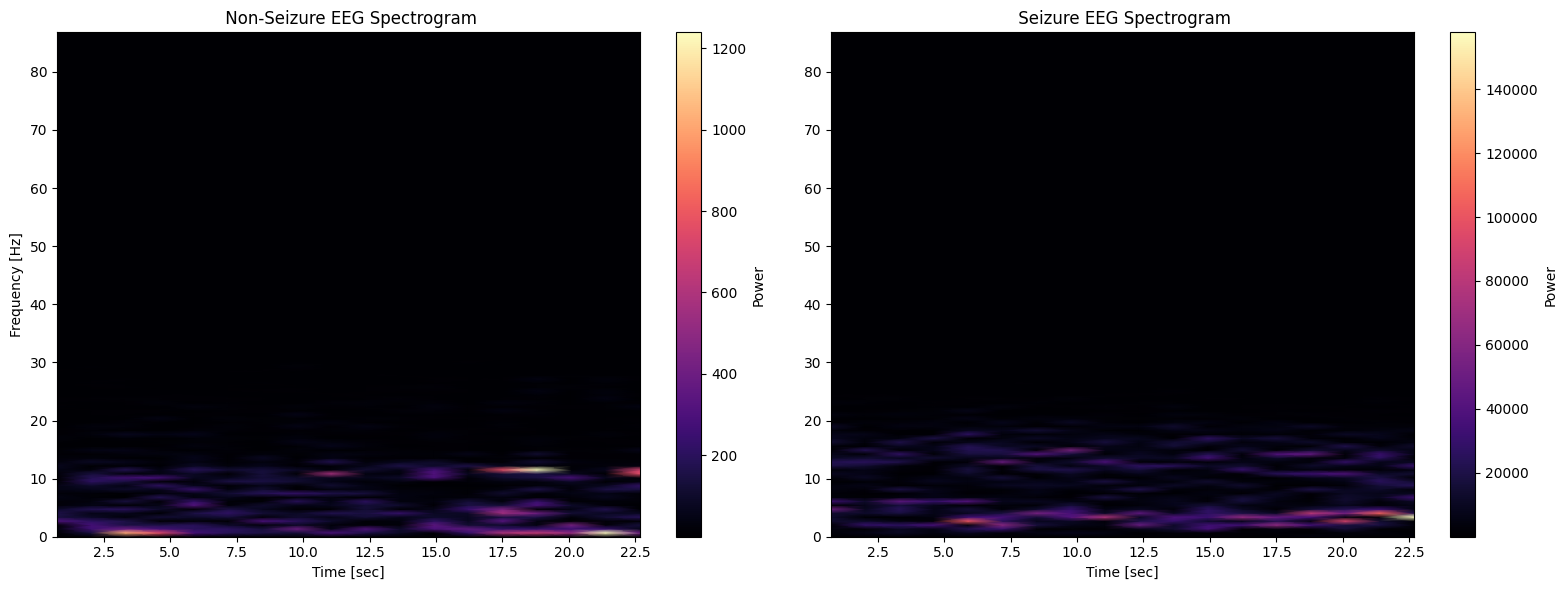

In [32]:
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Use same seizure and non-seizure samples from earlier
seizure_signal = df[df['condition'] == 'seizure'][signal_columns].iloc[0].astype(float).values
non_seizure_signal = df[df['condition'] == 'non-seizure'][signal_columns].iloc[0].astype(float).values

# Sampling frequency
fs = 173.61

# Compute spectrograms
f_s, t_s, Sxx_s = spectrogram(seizure_signal, fs)
f_n, t_n, Sxx_n = spectrogram(non_seizure_signal, fs)

# Plot both
plt.figure(figsize=(16, 6))

# Non-seizure
plt.subplot(1, 2, 1)
plt.pcolormesh(t_n, f_n, Sxx_n, shading='gouraud', cmap='magma')
plt.title(" Non-Seizure EEG Spectrogram")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Power')

# Seizure
plt.subplot(1, 2, 2)
plt.pcolormesh(t_s, f_s, Sxx_s, shading='gouraud', cmap='magma')
plt.title(" Seizure EEG Spectrogram")
plt.xlabel('Time [sec]')
plt.colorbar(label='Power')

plt.tight_layout()
plt.show()


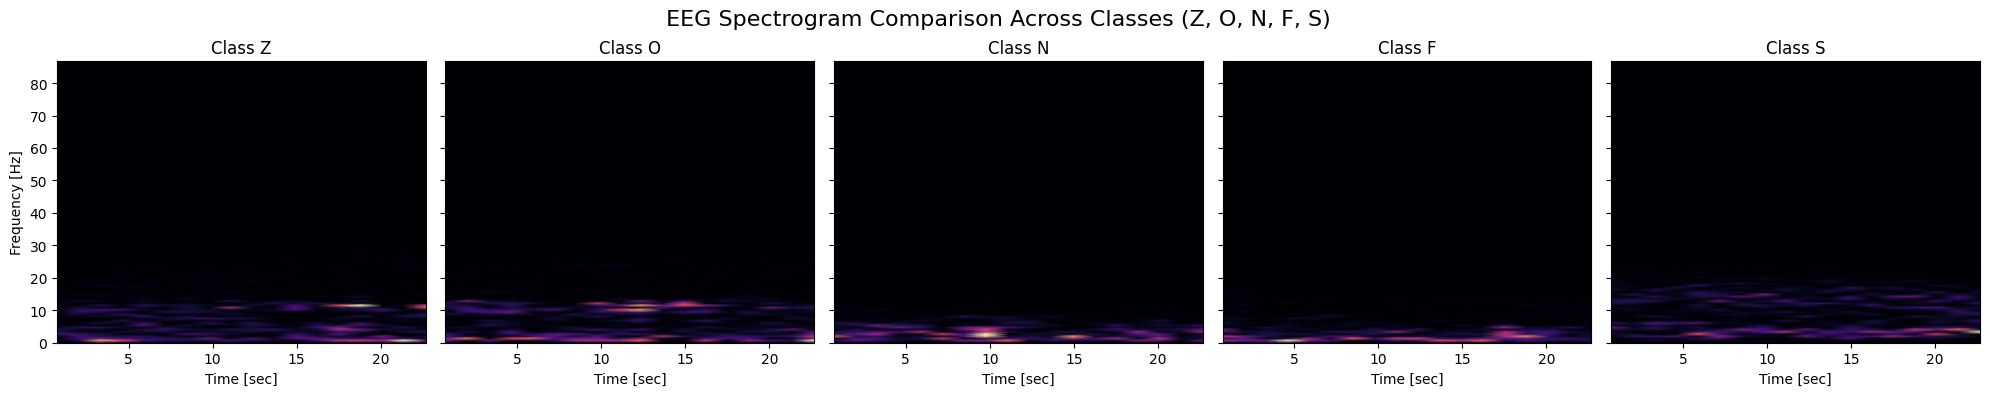

In [33]:
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import numpy as np

# Sampling rate
fs = 173.61

# Dictionary to store one signal from each class
example_signals = {}

for class_label in ['Z', 'O', 'N', 'F', 'S']:
    example_signals[class_label] = df[df['set'] == class_label][signal_columns].iloc[0].astype(float).values

# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)

for i, (class_label, signal) in enumerate(example_signals.items()):
    # Compute spectrogram
    f, t, Sxx = spectrogram(signal, fs)
    
    # Plot
    axs[i].pcolormesh(t, f, Sxx, shading='gouraud', cmap='magma')
    axs[i].set_title(f"Class {class_label}")
    axs[i].set_xlabel("Time [sec]")
    if i == 0:
        axs[i].set_ylabel("Frequency [Hz]")

# Overall layout
plt.suptitle(" EEG Spectrogram Comparison Across Classes (Z, O, N, F, S)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Sampling rate
fs = 173.61
n_signals = 10  # Number of signals per class to average
classes = ['Z', 'O', 'N', 'F', 'S']

# Ensure only signal columns are selected (t0, t1, ..., t4095)
signal_columns = [col for col in df.columns if col.startswith('t')]

# Create a folder to save images
os.makedirs("spectrograms", exist_ok=True)

# Generate and save spectrogram images per class
for label in classes:
    signals = df[df['set'] == label][signal_columns].iloc[:n_signals].astype(float).values
    all_sxx = []

    for signal in signals:
        f, t, Sxx = spectrogram(signal, fs)
        all_sxx.append(Sxx)

    avg_sxx = np.mean(all_sxx, axis=0)

    # Plot and save
    plt.figure(figsize=(6, 4))
    plt.pcolormesh(t, f, avg_sxx, shading='gouraud', cmap='magma')
    plt.title(f"Averaged Spectrogram - Class {label}")
    plt.xlabel("Time [sec]")
    plt.ylabel("Frequency [Hz]")
    plt.colorbar(label='Power')
    plt.tight_layout()

    # Save image
    plt.savefig(f"spectrograms/avg_spectrogram_{label}.png")
    plt.close()


In [35]:
# Save the advanced features as a CSV file
advanced_df.to_csv("advanced_eeg_features.csv", index=False)
